### persistence accuracy

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from project_utils import utils
from project_utils import read_utils as read
from project_utils import fig_utils as figu

In [2]:
import warnings
warnings.filterwarnings('ignore')
figu.set_plt_rc_params()

In [3]:
## prediction parameters
input_length = [12, 12, 12, 60] ## input tos variables, (number of averaged months for each), in REVERSE chronological order
orig_dates = utils.load_dates()
lats, lons = utils.load_lat_lon()
na_lats = np.array([lats[0:5], lats[-5:]]).reshape(-1)

from project_utils.variant_dict import VARIANT_DICT, test_index

In [4]:
y_var = "tos"
model_list=["ACCESS-ESM1-5", "CanESM5", "CNRM-CM6-1", "GISS-E2-1-G", 
            "IPSL-CM6A-LR", "MIROC-ES2L", "MIROC6", "MPI-ESM1-2-LR", "NorCPM1"]
leads = [0, 0, 24]
prediction_lengths = [36, 60, 60]

In [5]:
for MODEL in model_list:
    print(MODEL)
    test_variants = VARIANT_DICT[MODEL][test_index]   
    for lead, length in zip(leads, prediction_lengths):
        _, _, prediction_dates = utils.get_prediction_dates(orig_dates, input_length, lead, length)
        y_quantiles_test = read.read_data(y_var, MODEL, length, VARIANTS = test_variants, stat = "quantiles", 
                                 as_xarray=True)

        _, y_test = read.load_xy_data(orig_dates, input_length, lead, length, "tos", y_var,
                         test_variants, MODEL)
        y_test = xr.DataArray(data = y_test.reshape(len(test_variants), len(prediction_dates), len(lats), len(lons)), 
                      coords = dict(variant = test_variants, time = prediction_dates, lat = lats, lon = lons), 
                      name = y_var)
        y_test.loc[dict(lat=na_lats)] = np.nan

        y_persist = read.load_persistance_data(orig_dates, input_length, lead, length, "tos", test_variants, MODEL)
        y_persist = xr.DataArray(data = y_persist.reshape(len(test_variants), len(prediction_dates), len(lats), len(lons)), 
                      coords = dict(variant = test_variants, time = prediction_dates, lat = lats, lon = lons), 
                      name = y_var)
        y_persist.loc[dict(lat=na_lats)] = np.nan
        
        accuracy_ds = utils.calc_persistance_accuracy(y_test, y_quantiles_test, y_persist).rename("score")
        accuracy_ds.to_netcdf("../processed_data/accuracy/persistence_accuracy_"+MODEL+\
                          "_"+str(length)+"mo_"+str(lead)+"lead.nc")
        

ACCESS-ESM1-5
CanESM5
CNRM-CM6-1
GISS-E2-1-G
IPSL-CM6A-LR
MIROC-ES2L
MIROC6
MPI-ESM1-2-LR
NorCPM1


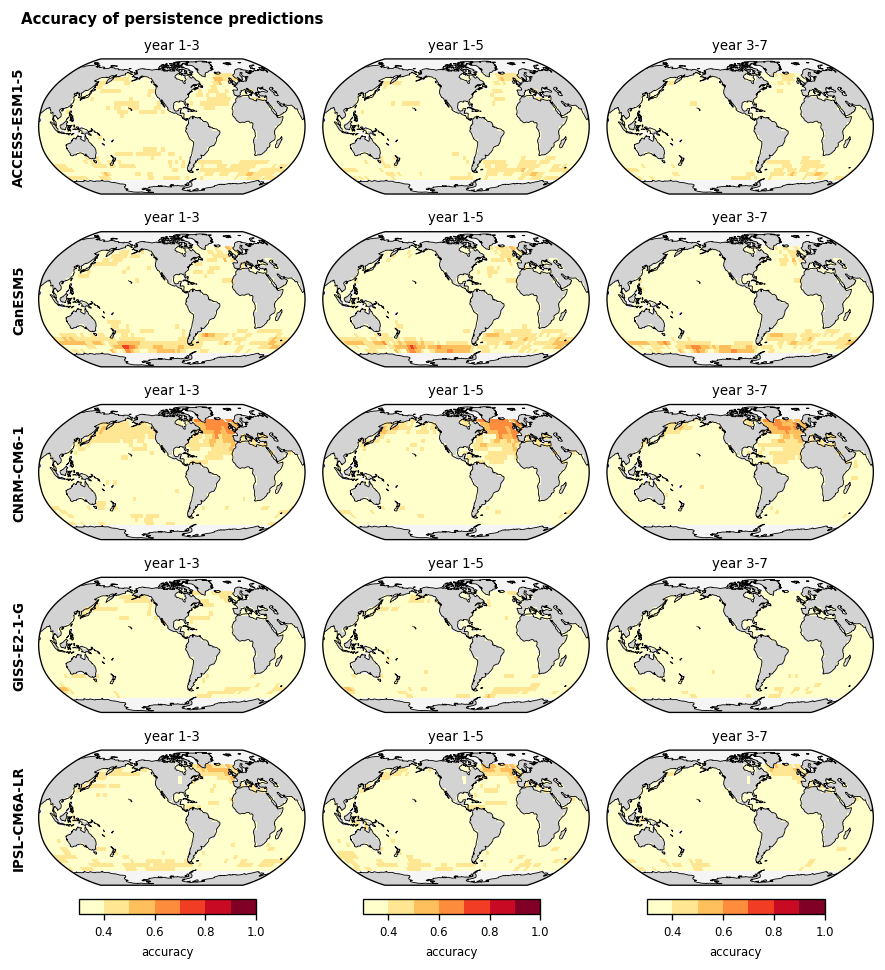

In [6]:
fig = plt.figure(figsize = (7.4, 8))

plt.suptitle("Accuracy of persistence predictions", y = 0.99, x = 0.03, size = 9, ha = "left", weight = "bold")

for i, MODEL in enumerate(model_list[0:5]):
    ax = fig.add_axes([.05, (4-(i % 5))*.18 + 0.06, 0.3, 0.18], projection = ccrs.Robinson(central_longitude = 260))
    acc_ds = xr.open_dataset("../processed_data/accuracy/persistence_accuracy_"+MODEL+"_36mo_0lead.nc")
    ax.set_title("year 1-3")
    ax.text(s = MODEL, x = -0.1, y = 0.5, rotation = "vertical", 
            transform = ax.transAxes, size = 8, weight = "bold", va = "center")
    p = figu.plot_map(acc_ds.score, lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)

    ax = fig.add_axes([.32 + .05, (4-(i % 5))*.18 + 0.06, 0.3, 0.18], projection = ccrs.Robinson(central_longitude = 260))
    acc_ds = xr.open_dataset("../processed_data/accuracy/persistence_accuracy_"+MODEL+"_60mo_0lead.nc")
    ax.set_title("year 1-5")
    p = figu.plot_map(acc_ds.score, lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)

    ax = fig.add_axes([2*.32 + .05, (4-(i % 5))*.18 + 0.06, 0.3, 0.18], projection = ccrs.Robinson(central_longitude = 260))
    acc_ds = xr.open_dataset("../processed_data/accuracy/persistence_accuracy_"+MODEL+"_60mo_24lead.nc")
    ax.set_title("year 3-7")
    p = figu.plot_map(acc_ds.score, lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)
    
cbaxes = fig.add_axes([.095, 0.05, 0.2, 0.015]) 
cbar = fig.colorbar(p, cax = cbaxes, label = 'accuracy', orientation = "horizontal")
cbar.ax.tick_params(labelsize=7)

cbaxes = fig.add_axes([.32 + .095, 0.05, 0.2, 0.015]) 
cbar = fig.colorbar(p, cax = cbaxes, label = 'accuracy', orientation = "horizontal")
cbar.ax.tick_params(labelsize=7)

cbaxes = fig.add_axes([2*.32 + .095, 0.05, 0.2, 0.015]) 
cbar = fig.colorbar(p, cax = cbaxes, label = 'accuracy', orientation = "horizontal")
cbar.ax.tick_params(labelsize=7)

plt.savefig("../figures/Fig_S10_persistence_accuracy_1.pdf")

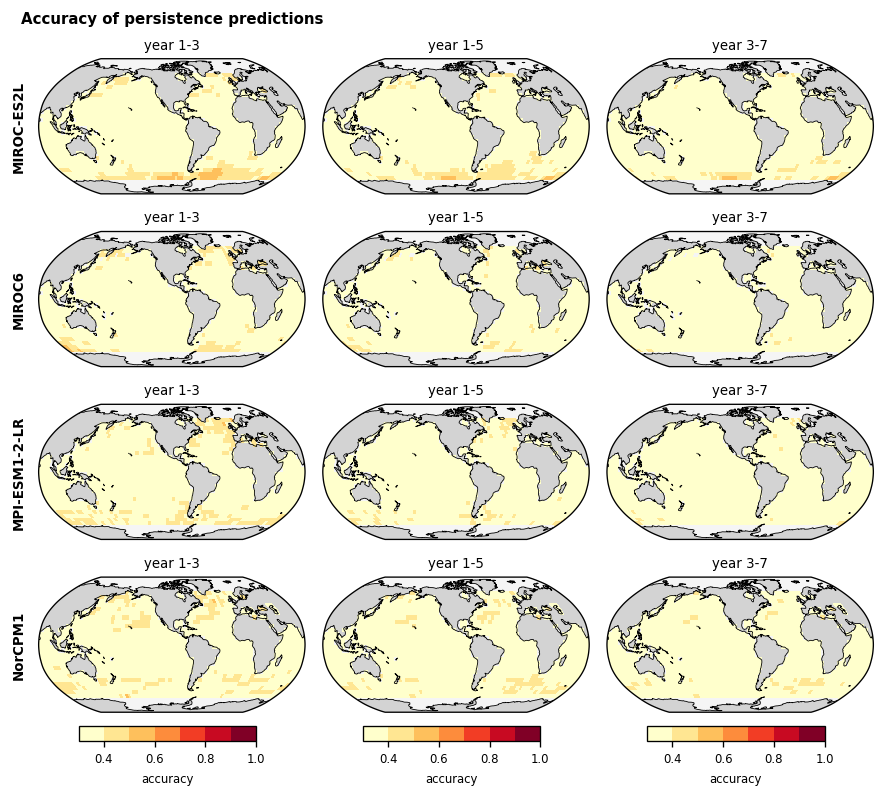

In [7]:
fig = plt.figure(figsize = (7.4, 8))

plt.suptitle("Accuracy of persistence predictions", y = 0.99, x = 0.03, size = 9, ha = "left", weight = "bold")

for i, MODEL in enumerate(model_list[5:9]):
    ax = fig.add_axes([.05, (4-(i % 5))*.18 + 0.06, 0.3, 0.18], projection = ccrs.Robinson(central_longitude = 260))
    acc_ds = xr.open_dataset("../processed_data/accuracy/persistence_accuracy_"+MODEL+"_36mo_0lead.nc")
    ax.set_title("year 1-3")
    ax.text(s = MODEL, x = -0.1, y = 0.5, rotation = "vertical", 
            transform = ax.transAxes, size = 8, weight = "bold", va = "center")
    p = figu.plot_map(acc_ds.score, lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)

    ax = fig.add_axes([.32 + .05, (4-(i % 5))*.18 + 0.06, 0.3, 0.18], projection = ccrs.Robinson(central_longitude = 260))
    acc_ds = xr.open_dataset("../processed_data/accuracy/persistence_accuracy_"+MODEL+"_60mo_0lead.nc")
    ax.set_title("year 1-5")
    p = figu.plot_map(acc_ds.score, lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)

    ax = fig.add_axes([2*.32 + .05, (4-(i % 5))*.18 + 0.06, 0.3, 0.18], projection = ccrs.Robinson(central_longitude = 260))
    acc_ds = xr.open_dataset("../processed_data/accuracy/persistence_accuracy_"+MODEL+"_60mo_24lead.nc")
    ax.set_title("year 3-7")
    p = figu.plot_map(acc_ds.score, lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)
    
cbaxes = fig.add_axes([.095, 0.05+0.18, 0.2, 0.015]) 
cbar = fig.colorbar(p, cax = cbaxes, label = 'accuracy', orientation = "horizontal")
cbar.ax.tick_params(labelsize=7)

cbaxes = fig.add_axes([.32 + .095, 0.05+0.18, 0.2, 0.015]) 
cbar = fig.colorbar(p, cax = cbaxes, label = 'accuracy', orientation = "horizontal")
cbar.ax.tick_params(labelsize=7)

cbaxes = fig.add_axes([2*.32 + .095, 0.05+0.18, 0.2, 0.015]) 
cbar = fig.colorbar(p, cax = cbaxes, label = 'accuracy', orientation = "horizontal")
cbar.ax.tick_params(labelsize=7)

plt.savefig("../figures/Fig_S11_persistance_accuracy_2.pdf")

### observed persistence accuracy

In [8]:
orig_dates = utils.load_dates(dataset="ERSSTv5")

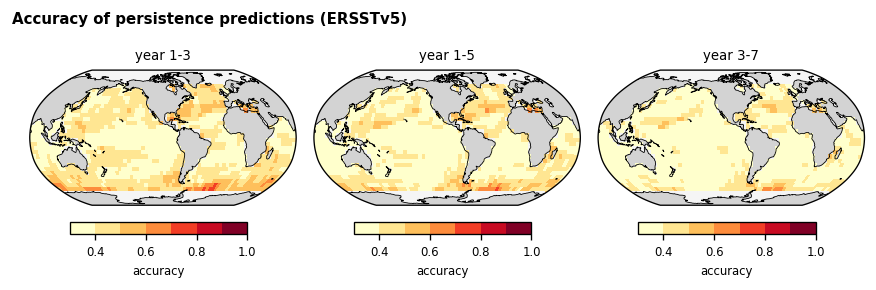

In [9]:
fig = plt.figure(figsize = (7.4, 2.5))

plt.suptitle("Accuracy of persistence predictions (ERSSTv5)", y = 0.97, x = 0.03, size = 9, 
             ha = "left", weight = "bold")

labels = ["year 1-3", "year 1-5", "year 3-7"] 

for j, (lead, length) in enumerate(zip(leads, prediction_lengths)):
    _, _, prediction_dates = utils.get_prediction_dates(orig_dates, input_length, lead, length)
    _, y_obs = read.load_xy_obs(orig_dates, input_length, lead, length, 
                              X_VAR_NAME = "sst", Y_VAR_NAME = "sst", 
                                 DATASET="ERSSTv5")
    y_obs = xr.DataArray(data = y_obs.reshape(1, len(prediction_dates), len(lats), len(lons)), 
                      coords = dict(variant = ["obs_variant"], time = prediction_dates, lat = lats, lon = lons), 
                      name = y_var)
    y_obs.loc[dict(lat=na_lats)] = np.nan
    
    y_persist = read.load_persistance_obs(orig_dates, input_length, lead, length, Y_VAR_NAME = "sst", 
                                 DATASET="ERSSTv5")
    y_persist = xr.DataArray(data = y_persist.reshape(1, len(prediction_dates), len(lats), len(lons)), 
                      coords = dict(variant = ["obs_variant"], time = prediction_dates, lat = lats, lon = lons), 
                      name = y_var)
    y_persist.loc[dict(lat=na_lats)] = np.nan
    
    y_quantiles = xr.open_dataset("../processed_data/ERSSTv5/sst_5x5_"+str(length)+"month_quantiles.nc").rename_dims(
        {"quantile":"q"})
    
    accuracy_ds = utils.calc_persistance_accuracy(y_obs, y_quantiles, y_persist)
    ax = fig.add_axes([j*0.32 + .05, 0.1, 0.3, 0.9], projection = ccrs.Robinson(central_longitude = 260))
    ax.set_title(labels[j])
    p = figu.plot_map(accuracy_ds.sst, lons, lats, ax, VMIN = .3, VMAX = 1, CMAP = figu.ylorrd, legend = False)

    cbaxes = fig.add_axes([j*0.32+ .095, 0.05+0.18, 0.2, 0.04]) 
    cbar = fig.colorbar(p, cax = cbaxes, label = 'accuracy', orientation = "horizontal")
    cbar.ax.tick_params(labelsize=7)
                       
plt.savefig("../figures/Fig_S14_ERSSTv5_persistence_accuracy.pdf")